In [2]:
# 이 폴더가 깃허브 어떤 브랜치에 있는지 먼저 확인하고 작업할 것  
# 삼성전자        131
# 현대차         130
# POSCO       110
# 현대모비스       102
# 삼성전자우        87
# 한국전력         84
# SK하이닉스       83
# 신한지주         82
# LG화학         76
# 삼성생명         60
# NAVER        58
# 위종목에 대해 2009~2018년 데이터를 수집 후 , 로그 수익률로 변형
# 2019년 데이터도 받야야함 

1.삼성전자 = 005930
2.현대차 = 005380
3.POSCO = 005490
4.현대모비스 = 012330
5.한국전력 = 015760
6. SK하이닉스 = 000660
7.신한지주 = 055550
8.LG화학 = 051915
9.삼성생명 = 032830
10. NAVER = 035420

[005930, 005380, 05490, 012330, 015760, 00660, 055550, 051915, 03280, 035420]

### 시계열 데이터 분석 + ARIMA 모델 사용

In [4]:
#!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/60/d0/30f3ecd4dcafa87cd024a2687a6be7aa14f94d75c040192f8f8629ef8ad8/Cython-3.0.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ------- -------------------------------- 122.9/614.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 16.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 16.5 MB/s eta 0:00:01
   -----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [5]:
import yfinance as yf
import pmdarima as pm
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pmdarima.arima import ndiffs
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
# 1. 데이터 수집(시가총액 10위)
stocks = ['삼성전자','현대차', 'POSCO', '현대모비스', '한국전력','SK하이닉스', '신한지주', 'LG화학', '삼성생명', 'NAVER']
ticker = ['005930', '005380', '005490', '012330', '015760', '000660', '055550', '051915', '032830', '035420']
st = {}

for i, t in enumerate(ticker):
    symbol = t+'.KS'
    data = yf.download(symbol , '2009-01-01', '2019-12-31')
    st[stocks[i]] = data

st

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'삼성전자':                Open     High      Low    Close     Adj Close    Volume
 Date                                                                  
 2009-01-02   9070.0   9400.0   8850.0   9400.0   7192.033691  22978400
 2009-01-05   9600.0   9740.0   9470.0   9520.0   7283.846191  30460450
 2009-01-06   9640.0  10040.0   9590.0   9960.0   7620.494629  45072450
 2009-01-07  10100.0  10480.0   9980.0  10480.0   8018.350586  41286200
 2009-01-08  10360.0  10380.0  10060.0  10160.0   7773.517090  30614600
 ...             ...      ...      ...      ...           ...       ...
 2019-12-23  56100.0  56400.0  55100.0  55500.0  49987.878906   9839252
 2019-12-24  55600.0  55700.0  54800.0  55000.0  49537.542969  11868463
 2019-12-26  54700.0  55400.0  54400.0  55400.0  49897.812500   9645034
 2019-12-27  55700.0  56900.0  55500.0  56500.0  51215.832031  12313056
 2019-12-30  56200.0  56600.0  55700.0  55800.0  50581.292969   8356767
 
 [2718 rows x 6 columns],
 '현대차':                 Open

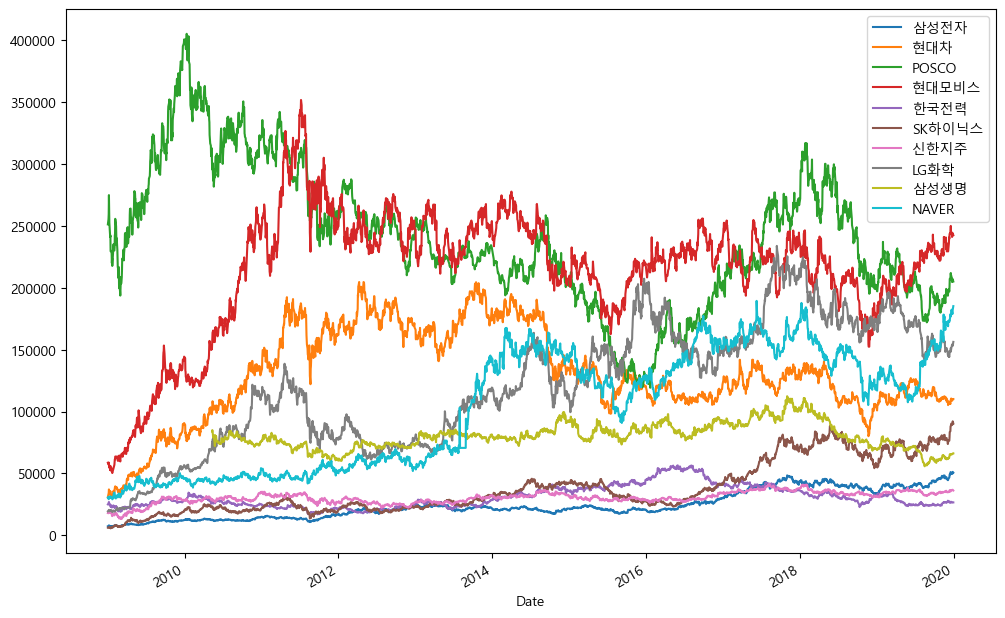

In [5]:
# 2. Adj Close 추세 확인
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 8))
for k, v in st.items():
    v['Adj Close'].plot(label=k)

plt.legend()

C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


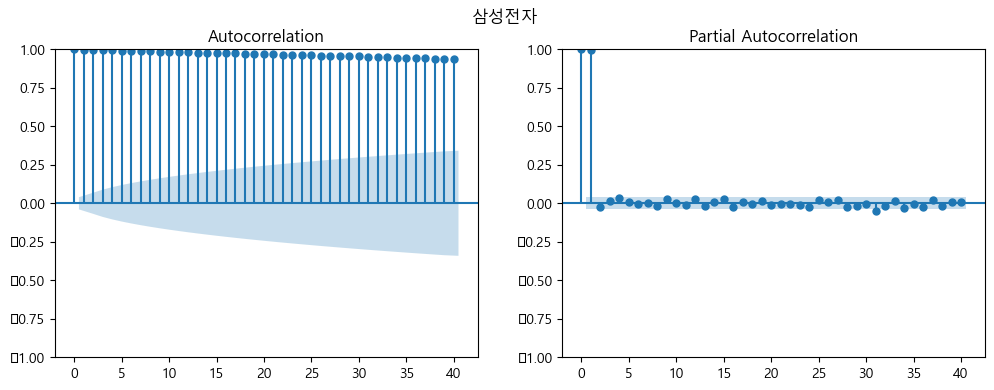

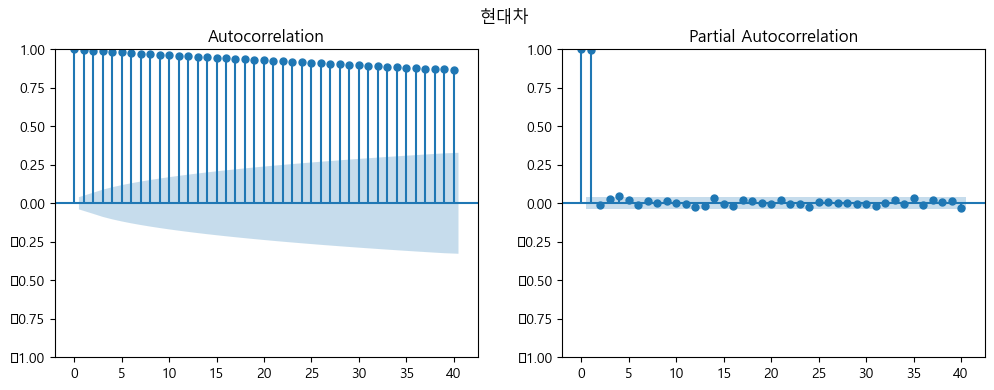

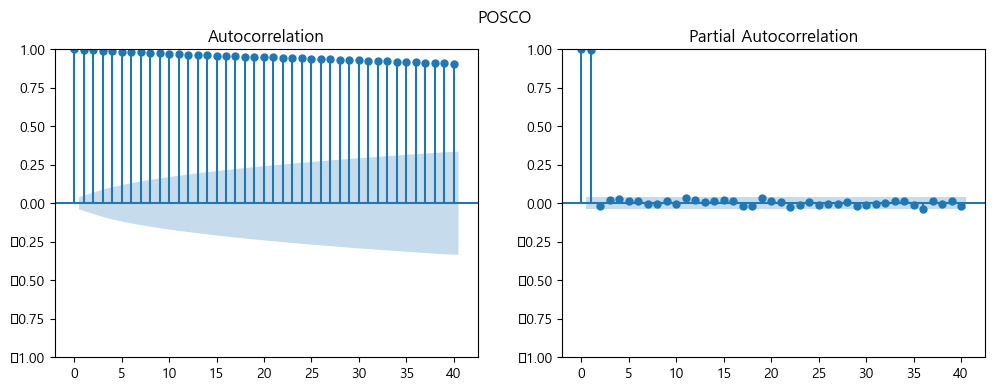

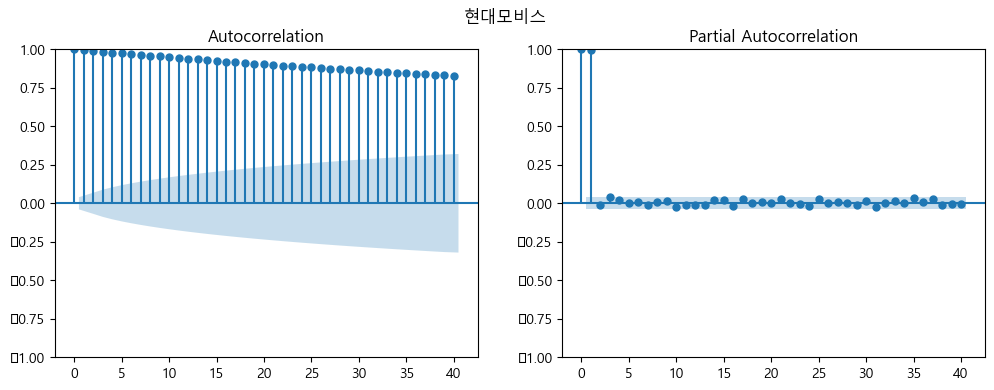

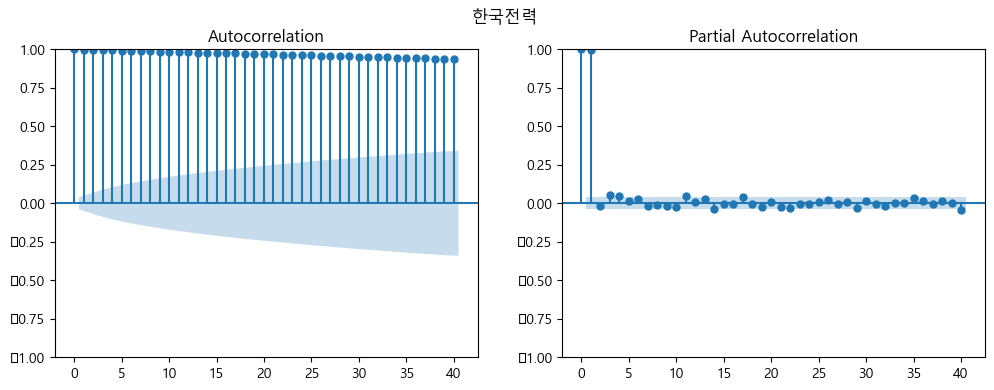

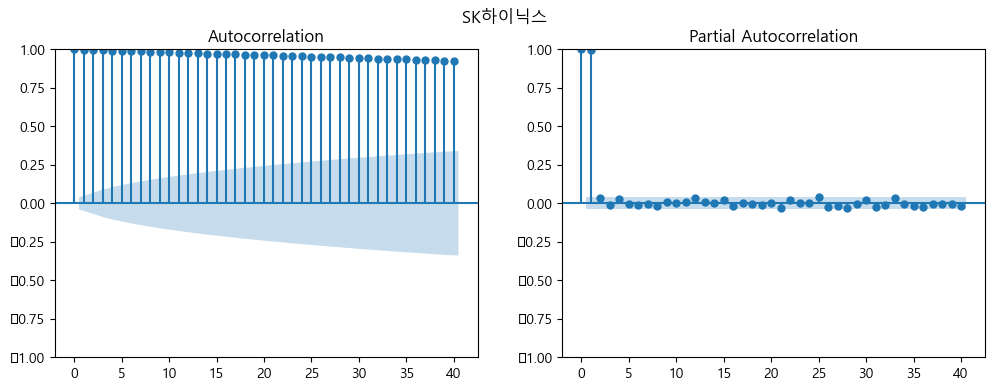

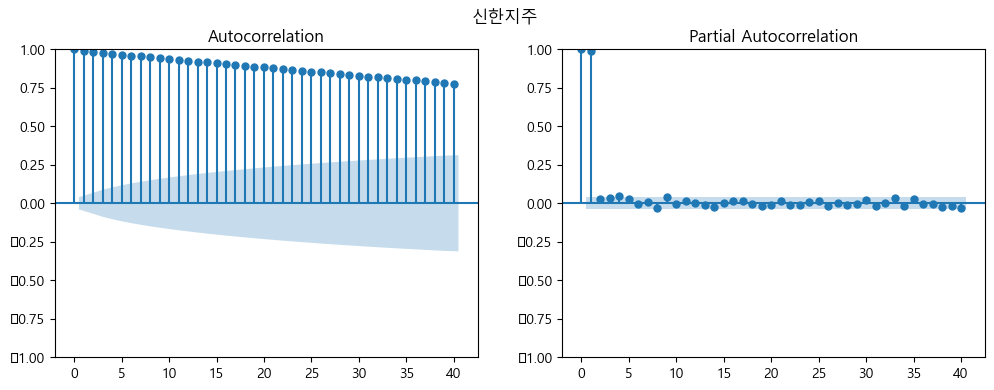

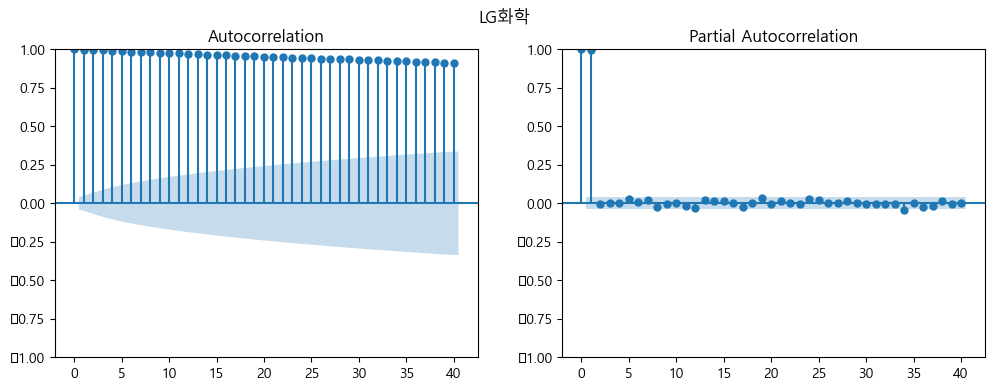

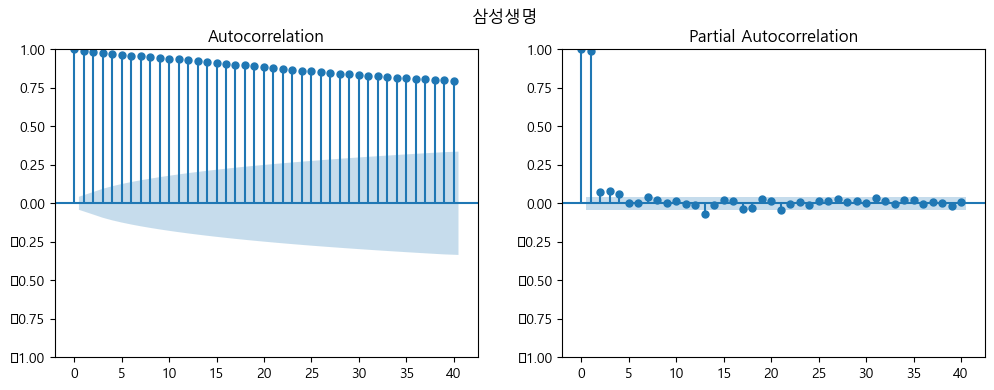

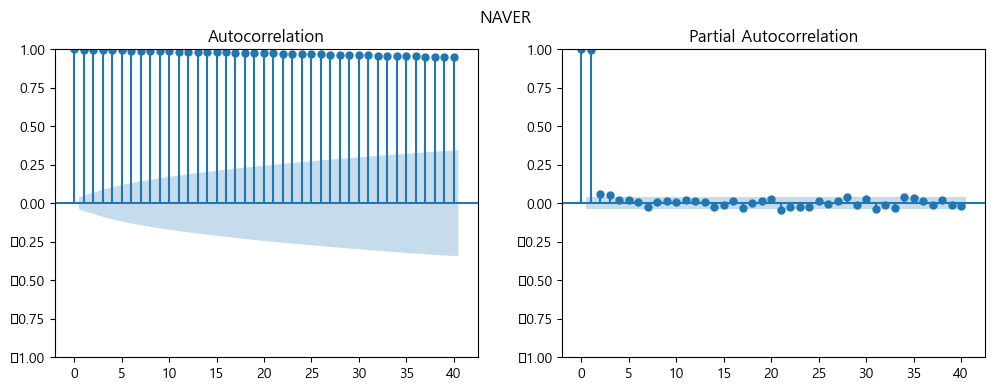

In [6]:
# 3. 데이터 분리
for k, v in st.items(): 
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False ,random_state=42)

    # 4. ACF를 통한 정상성, 비정상성 확인
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plt.suptitle(k)
    plot_acf(df_train['Adj Close'],lags=40 ,ax=ax[0])
    plot_pacf(df_train['Adj Close'], lags=40, ax=ax[1])

C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


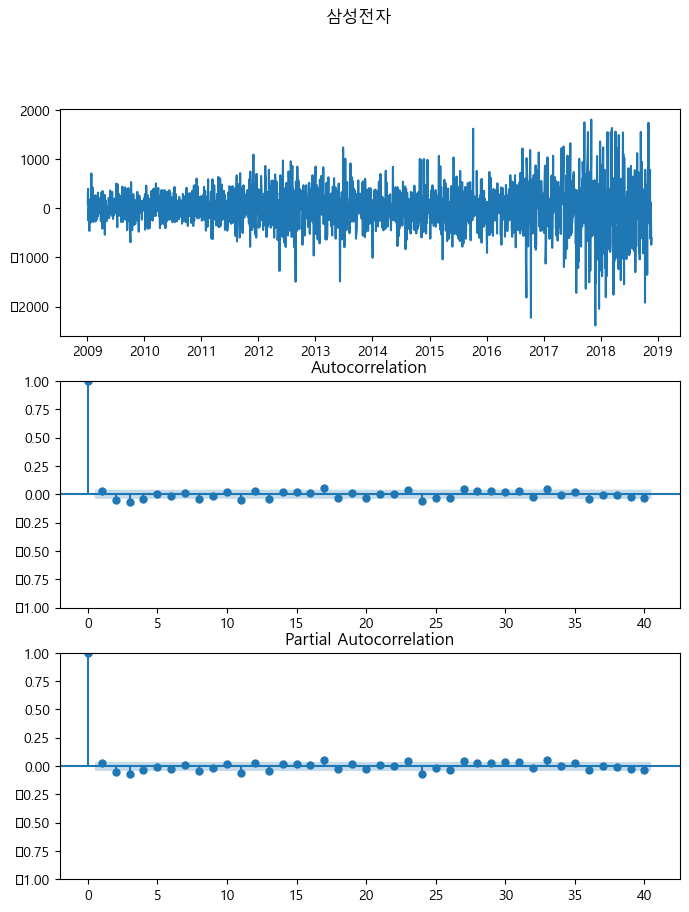

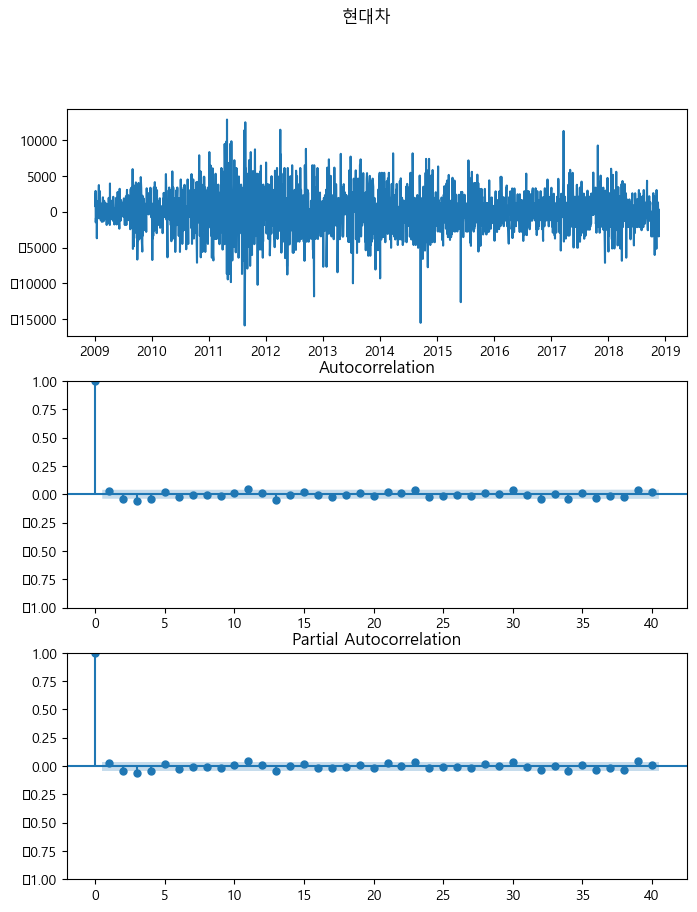

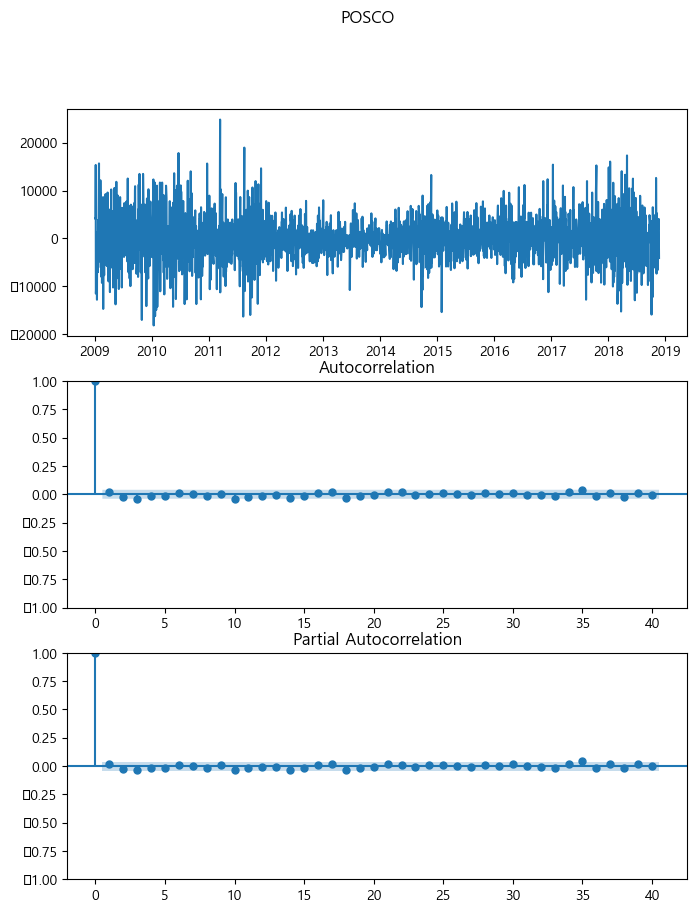

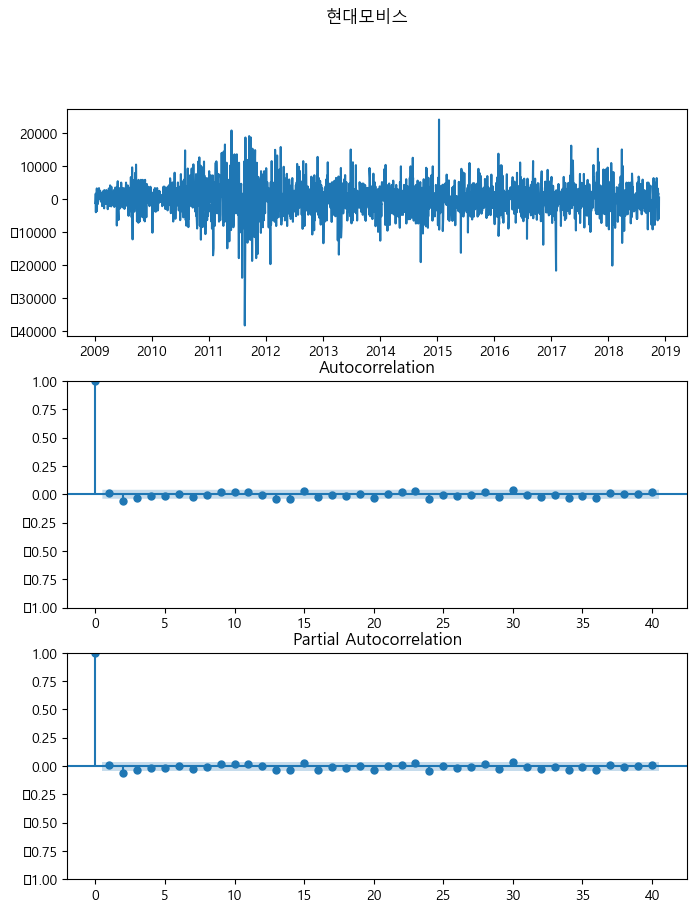

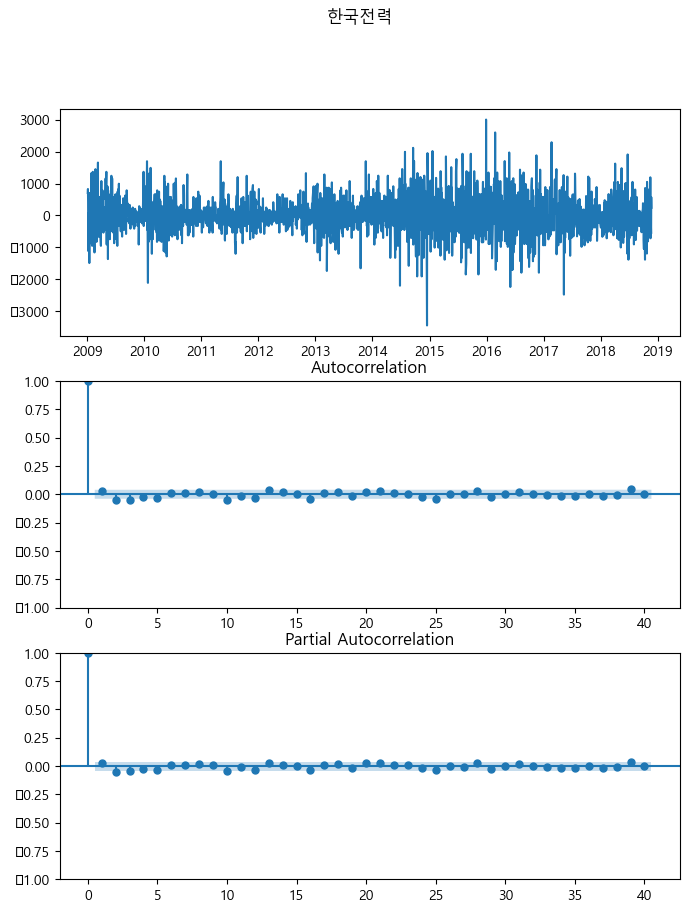

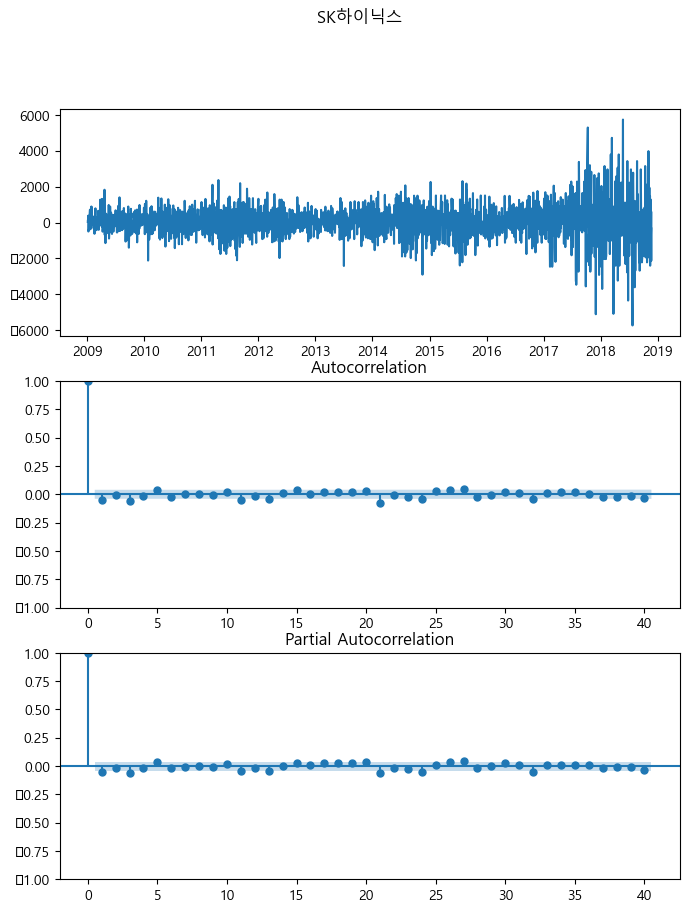

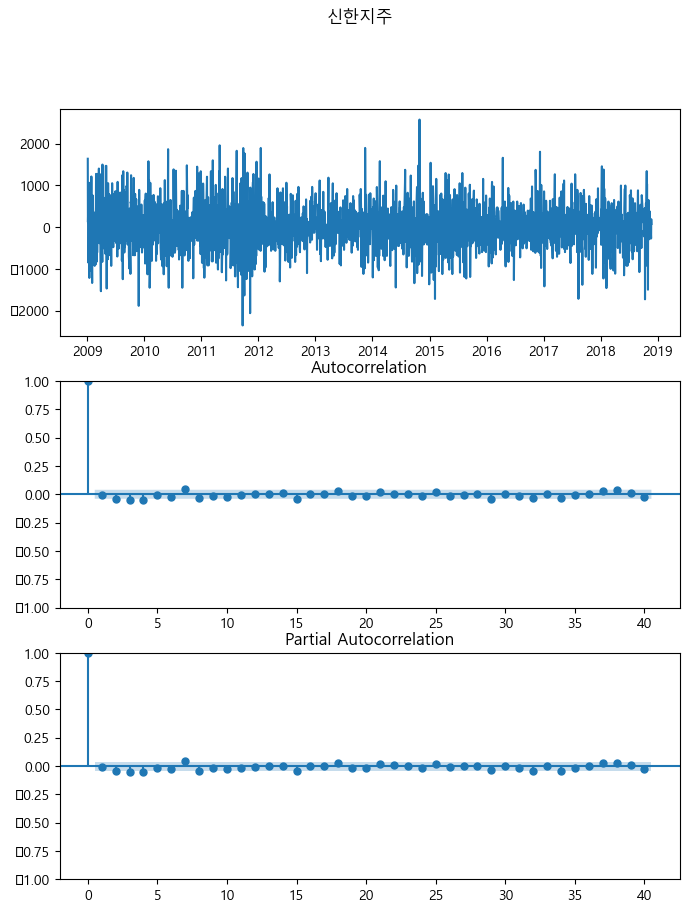

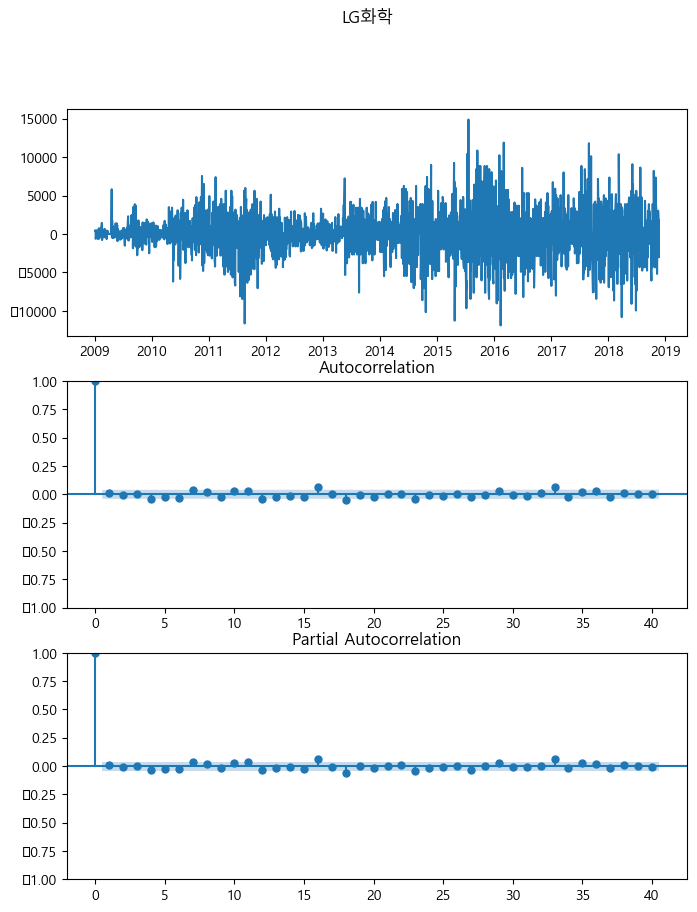

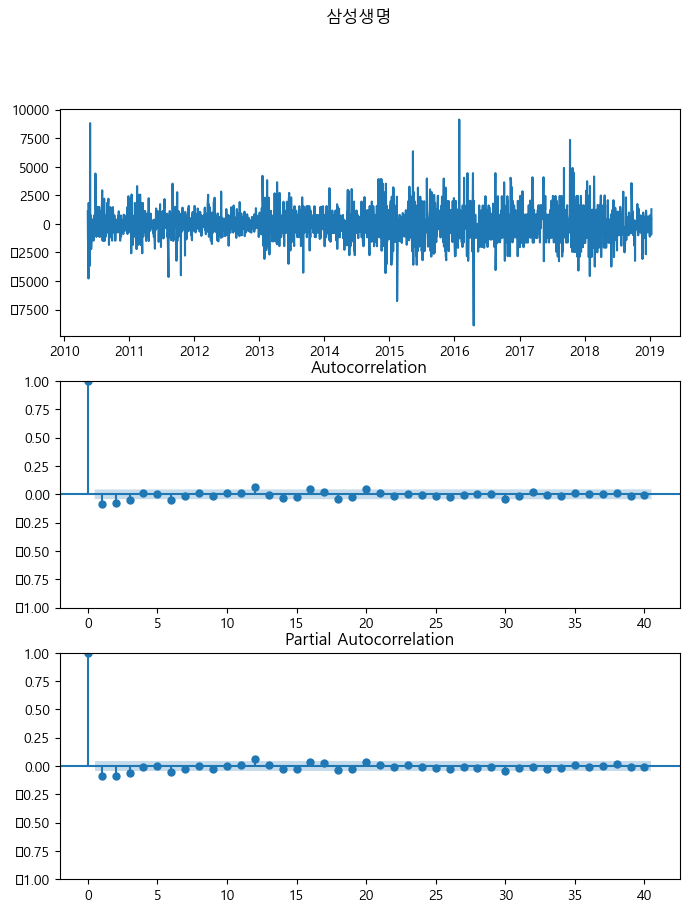

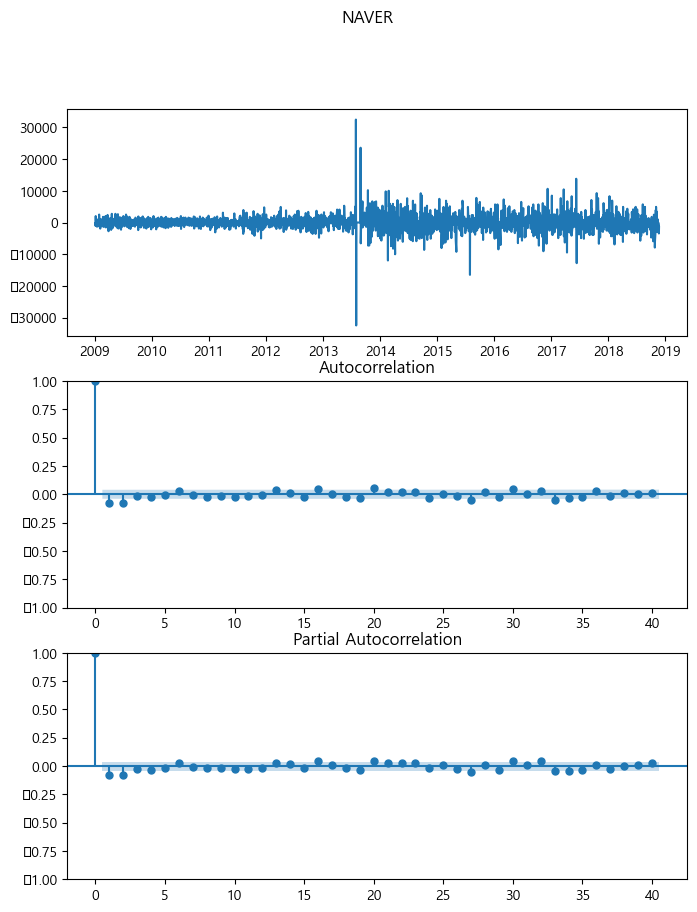

In [7]:
# 5. 차분 진행
for k, v in st.items():
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False ,random_state=42)
    
    # 적절한 차분 횟수 확인
    # alpha는 adf테스트에서 사용되는 유의 수준!
    diff = ndiffs(df_train['Adj Close'], test='adf', alpha=0.05, max_d=5)

    # 차분 진행!
    if diff >= 1:
        diff_train = df_train.diff(diff).dropna()
    
    
    # 차분 후 acf, pacf 그래프 그려보기
    fig, ax = plt.subplots(3, 1, figsize=(8, 10))

    ax[0].plot(diff_train.index, diff_train['Adj Close'])
    plot_acf(diff_train['Adj Close'], lags=40 ,ax=ax[1])
    plot_pacf(diff_train['Adj Close'], lags=40 ,ax=ax[2])
    
    plt.suptitle(k)


C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


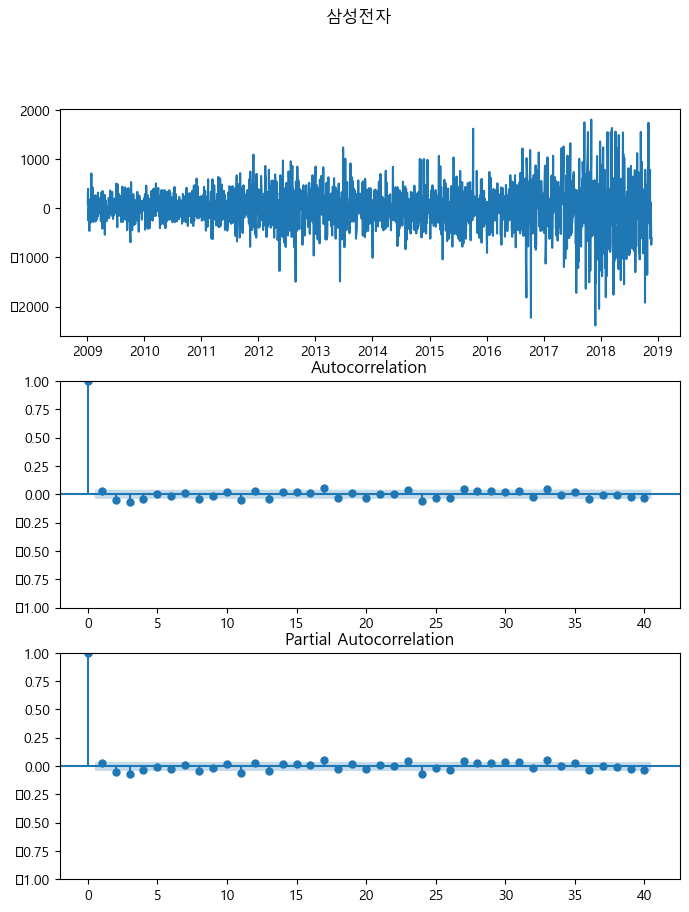

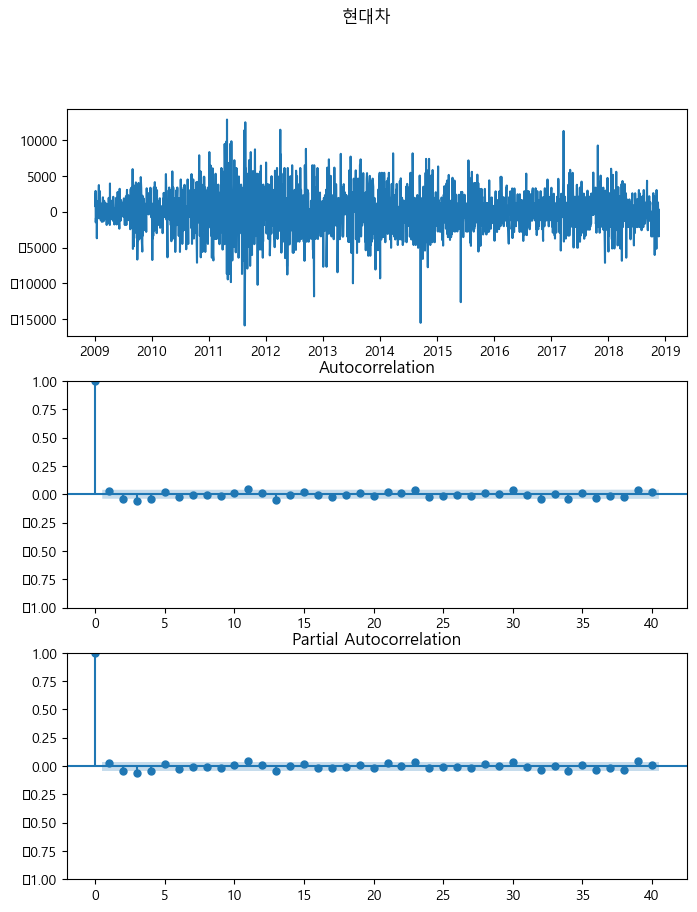

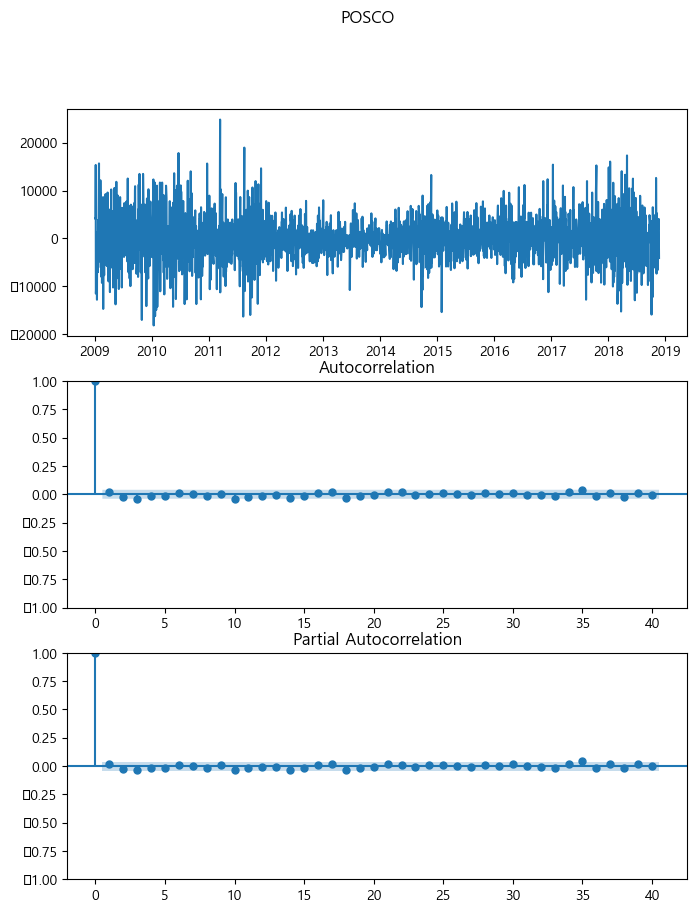

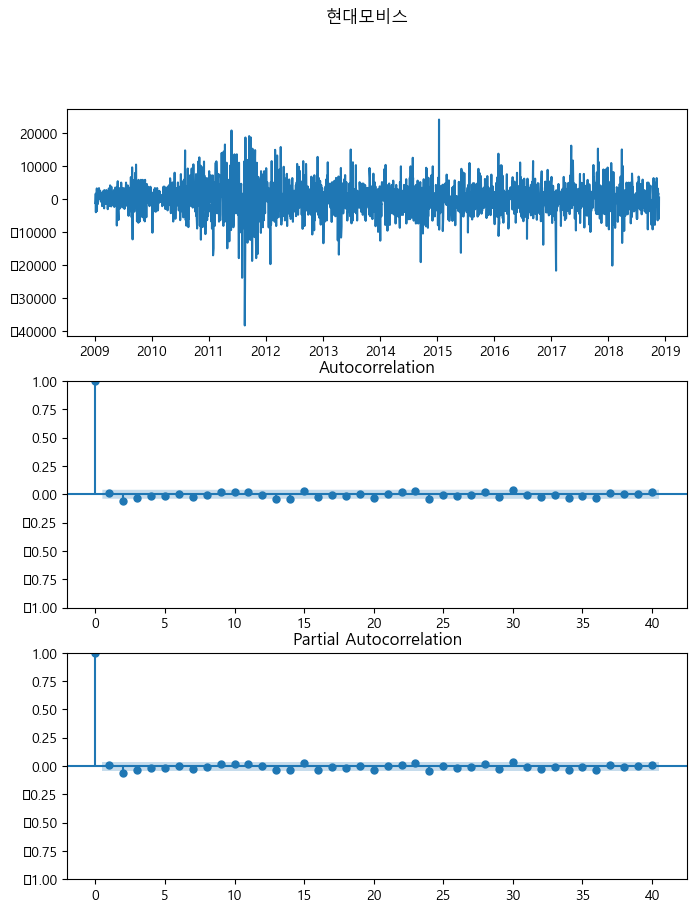

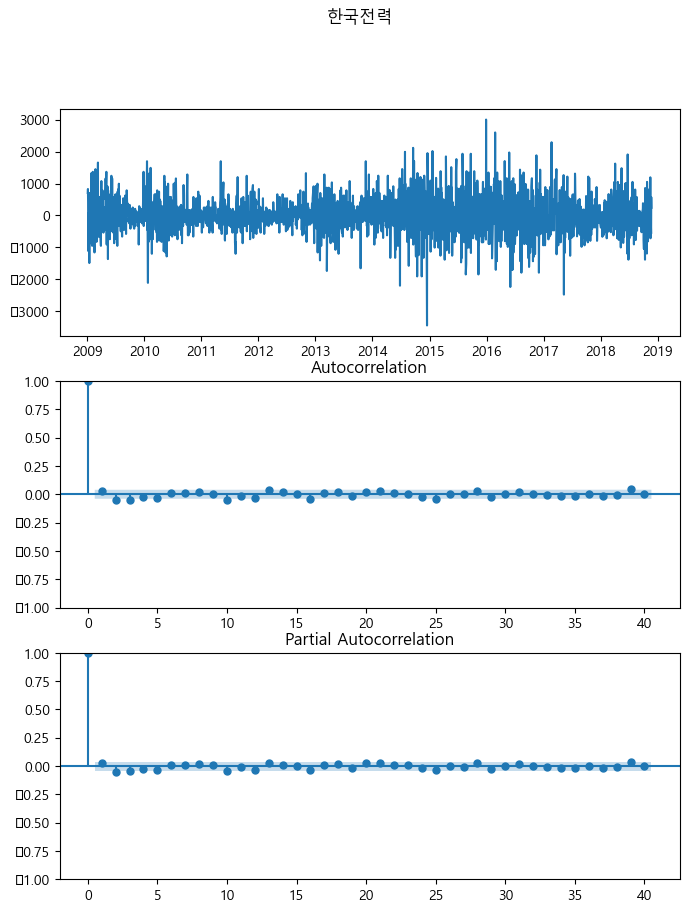

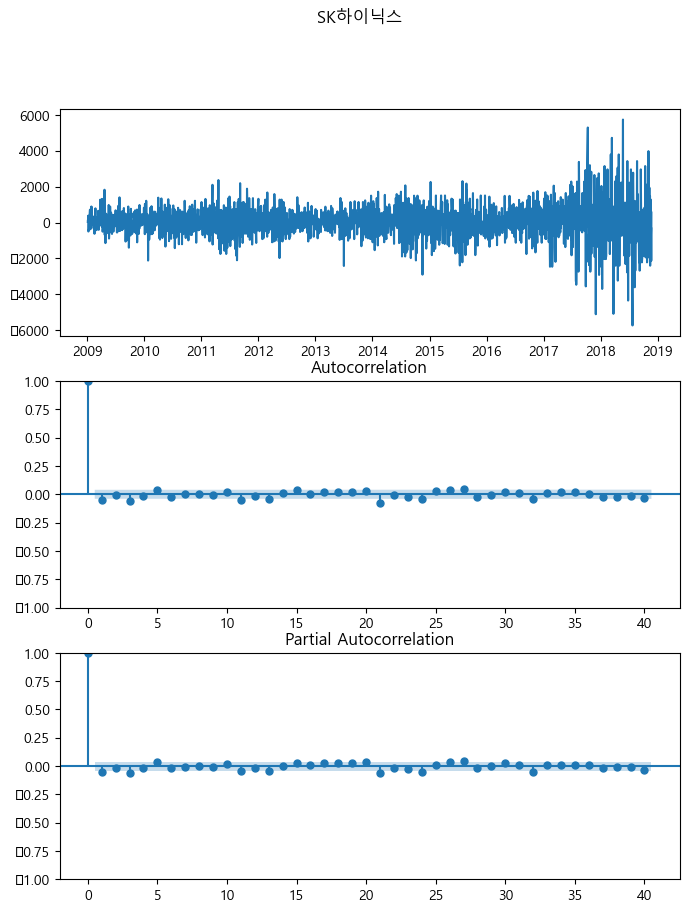

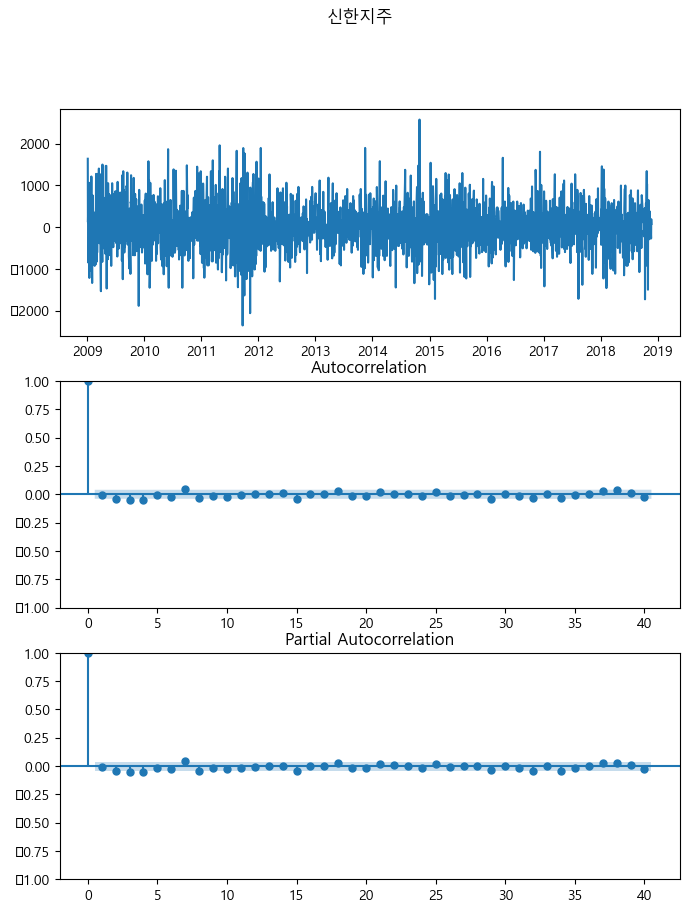

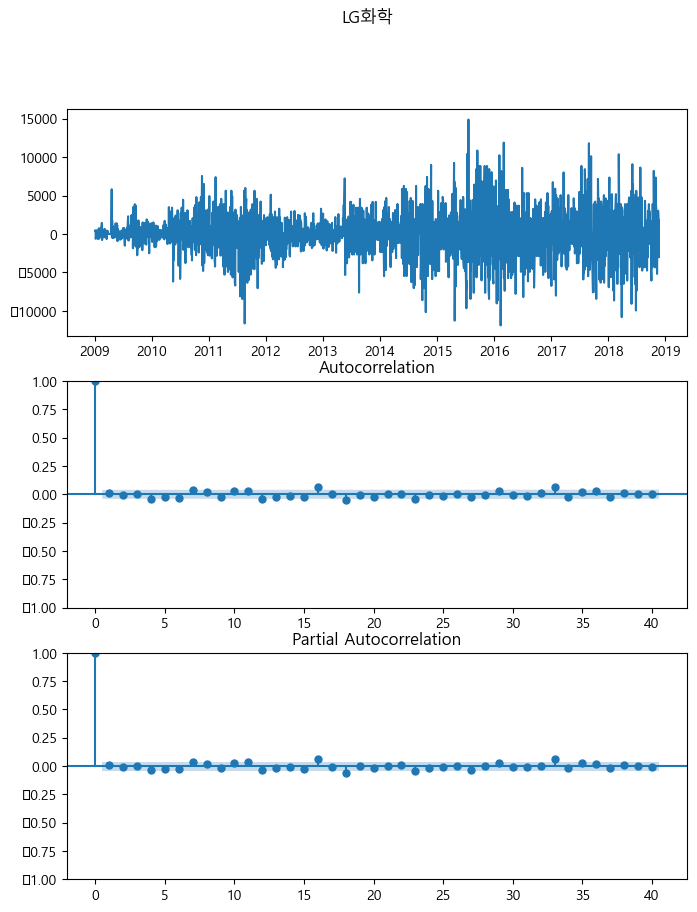

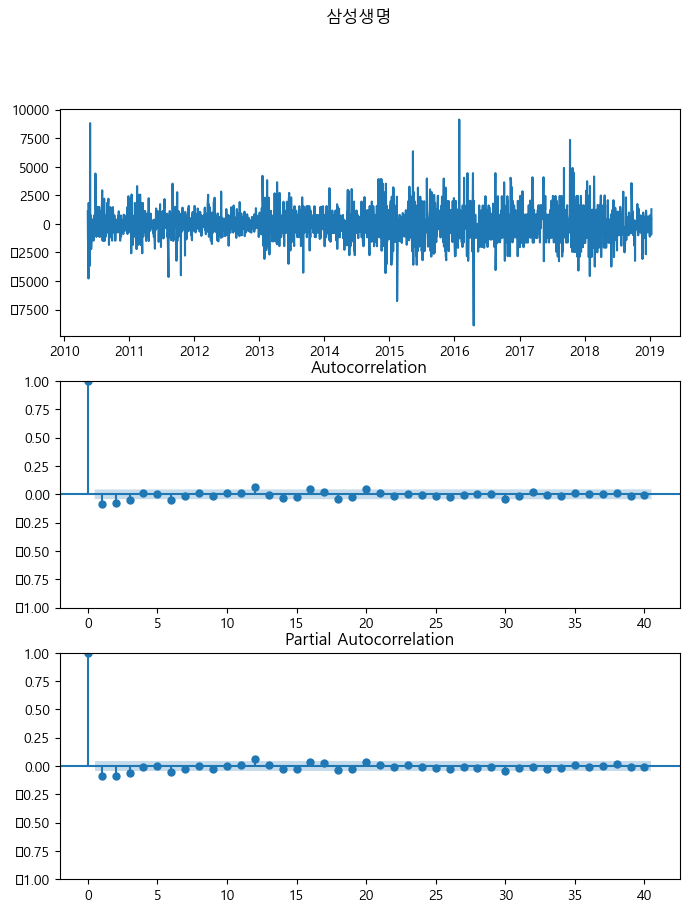

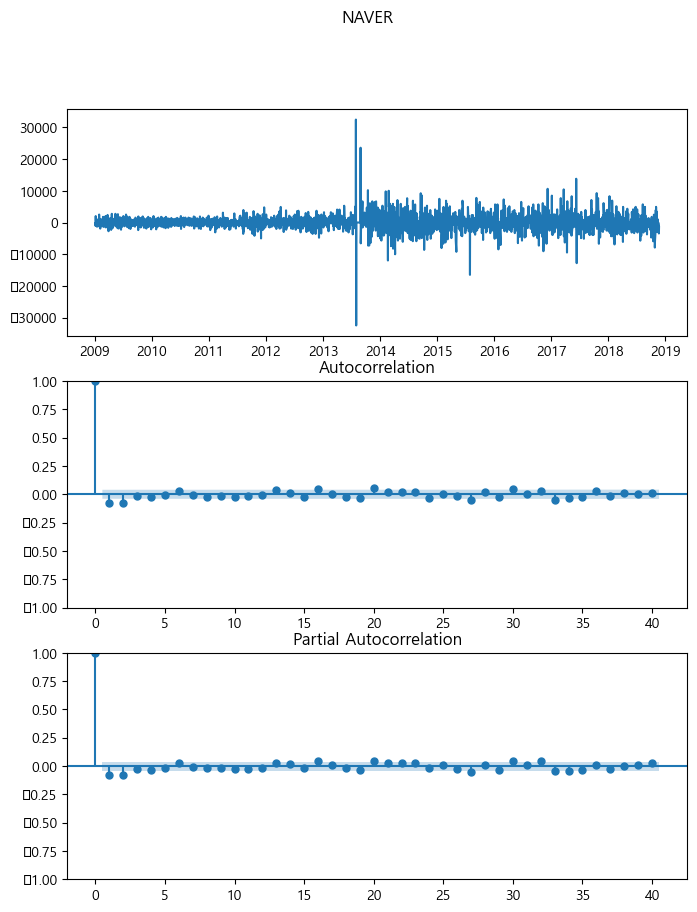

In [8]:
# 6. parameter search(어떤 모델을 사용할지 설정)
# 5. 차분 진행
for k, v in st.items():
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False ,random_state=42)
    
    # 적절한 차분 횟수 확인
    # alpha는 adf테스트에서 사용되는 유의 수준!
    diff = ndiffs(df_train['Adj Close'], test='adf', alpha=0.05, max_d=5)

    # 차분 진행!
    if diff >= 1:
        diff_train = df_train.diff(diff).dropna()
    
    
    # 차분 후 acf, pacf 그래프 그려보기
    fig, ax = plt.subplots(3, 1, figsize=(8, 10))

    ax[0].plot(diff_train.index, diff_train['Adj Close'])
    plot_acf(diff_train['Adj Close'], lags=40 ,ax=ax[1])
    plot_pacf(diff_train['Adj Close'], lags=40 ,ax=ax[2])
    
    plt.suptitle(k)


In [9]:
# 7. 모델 예측
for k, v in st.items():
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False ,random_state=42)

    # model.predict를 통해 미래값을 예측하는데 사용!
    # forecast 는 예측된 값, conf_int : 예측 구간
    forecast = model.predict(len(df_test), return_conf_int=True, start=df_test.index[0], end=df_test.index[-1])

NameError: name 'model' is not defined

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=36307.424, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=36307.583, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=36303.438, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=36293.076, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=36290.857, Time=0.25 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=36292.826, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=36307.760, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=36308.357, Time=0.98 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=36290.104, Time=1.11 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=36292.898, Time=0.66 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=36292.853, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=36303.131, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=36289.430, Time=1.43 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=36291.027, Time=1.65 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=36292.214, Time=2.80

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


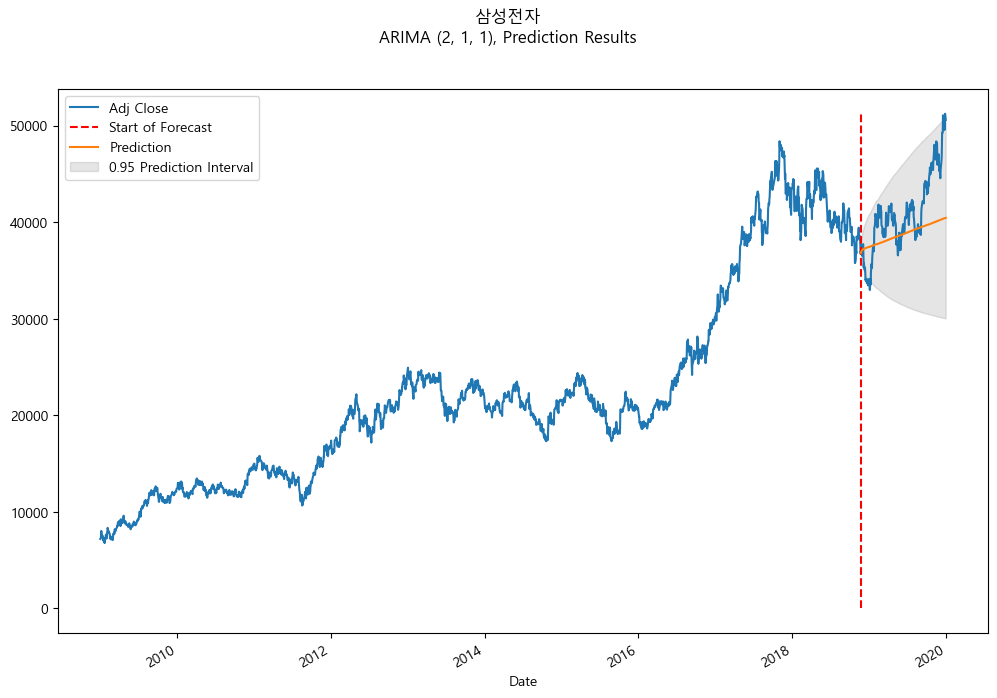

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=45681.530, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=45681.513, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=45680.070, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=45674.308, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=45670.433, Time=0.22 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=45671.993, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=45681.658, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=45679.832, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=45673.084, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=45672.328, Time=0.75 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=45671.322, Time=0.89 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=45679.855, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=45672.198, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=45673.205, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=45674.185, Time=1.13

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


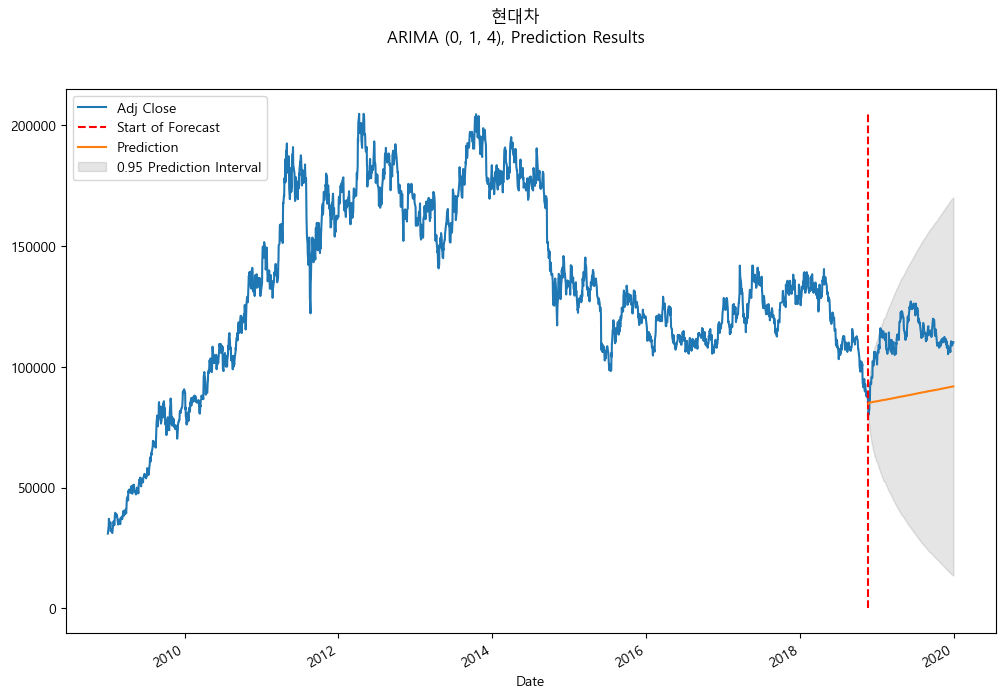

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=48097.440, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=48097.876, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=48099.861, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=48100.349, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=48096.687, Time=0.31 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=48093.064, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=48097.834, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=48098.582, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=48097.349, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=48096.917, Time=1.08 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=48089.054, Time=1.28 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=48099.788, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=48100.609, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=48100.967, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=48092.264, Time=2.84

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


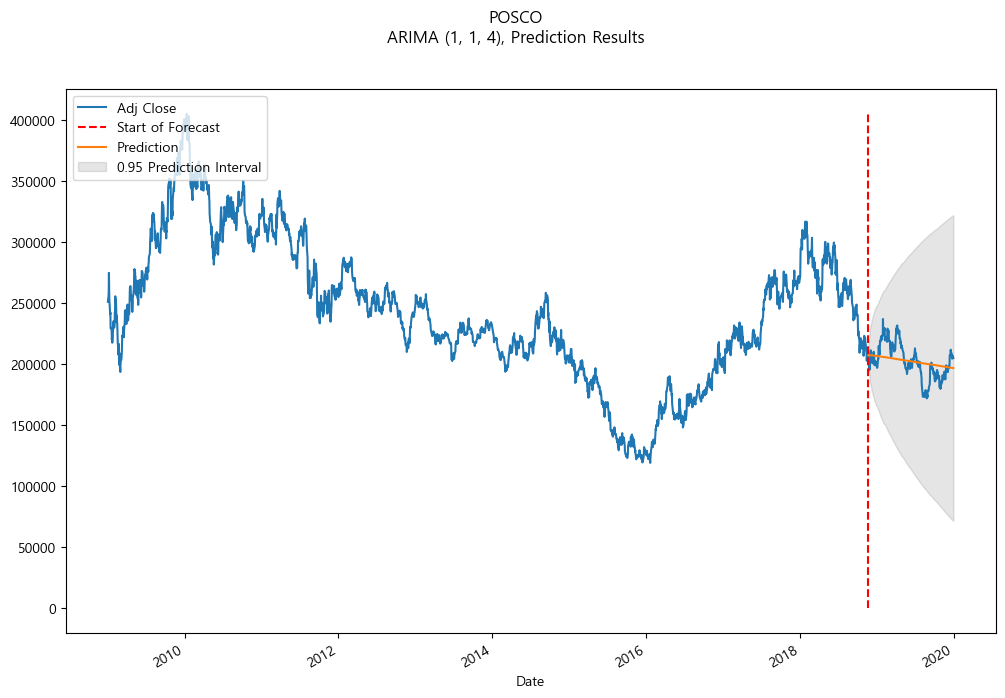

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=48172.345, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=48174.220, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=48168.298, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=48167.750, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=48168.779, Time=0.28 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=48170.179, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=48174.232, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=48172.847, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=48166.866, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=48168.748, Time=0.65 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=48170.623, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=48168.517, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=48166.781, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=48168.864, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=48170.429, Time=0.69

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


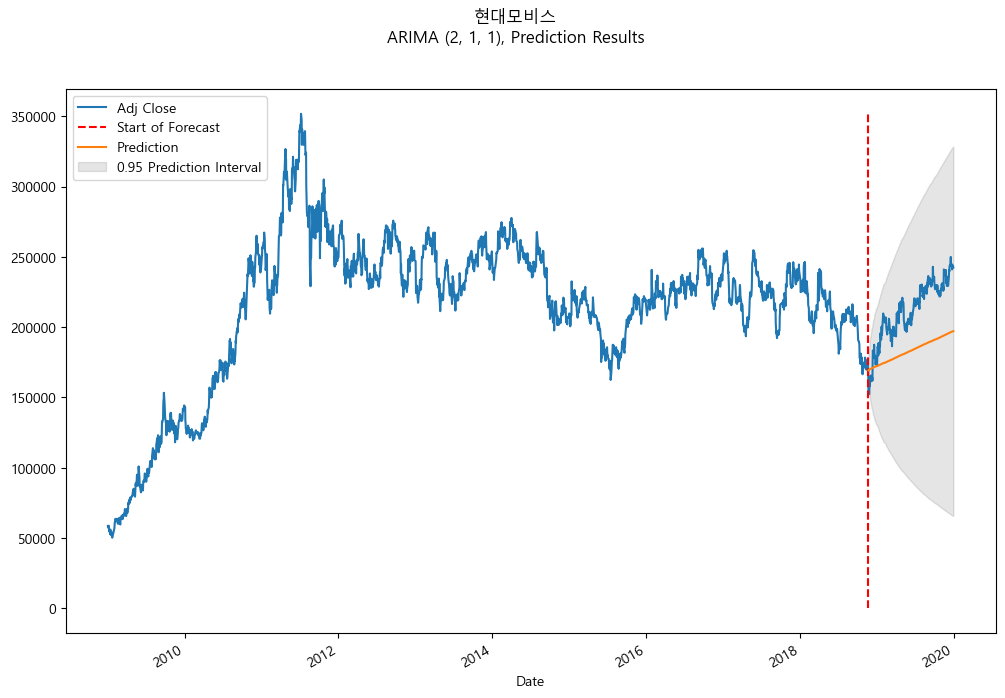

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=37843.727, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=37843.315, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=37840.271, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=37837.007, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=37837.466, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=37835.720, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=37843.526, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=37843.914, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=37834.300, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=37836.033, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=37837.973, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=37839.981, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=37834.039, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=37834.674, Time=1.31 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=37837.636, Time=1.44

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


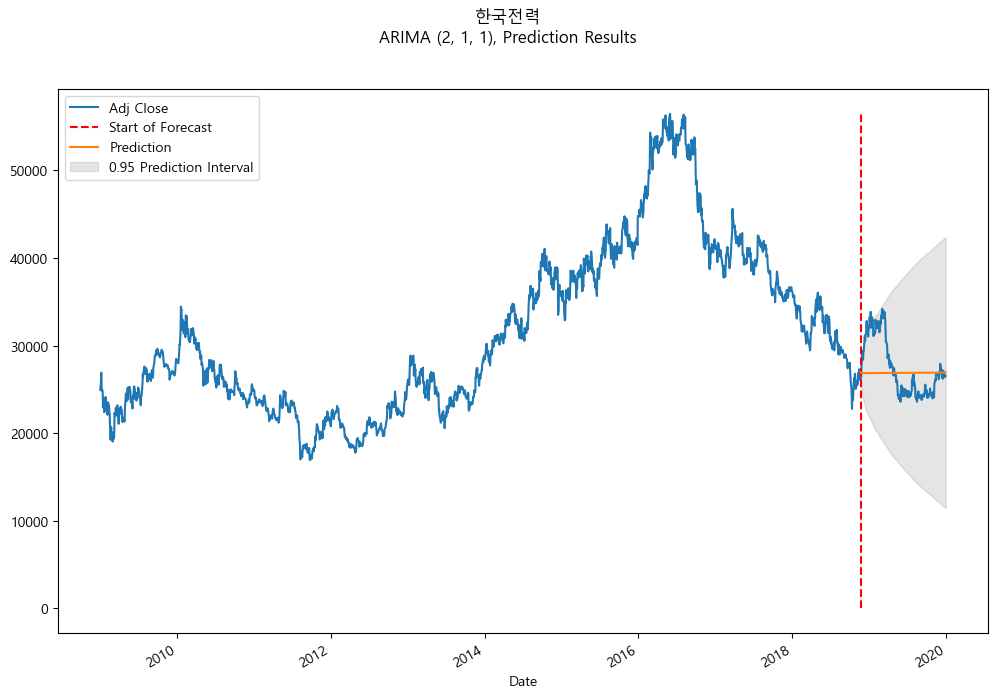

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=40048.782, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=40043.321, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=40044.628, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=40037.608, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=40039.390, Time=0.24 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=40038.984, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=40043.535, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=40043.538, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=40045.303, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=40039.558, Time=0.80 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=40039.994, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=40045.119, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=40045.457, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=40044.401, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=40039.597, Time=0.89

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


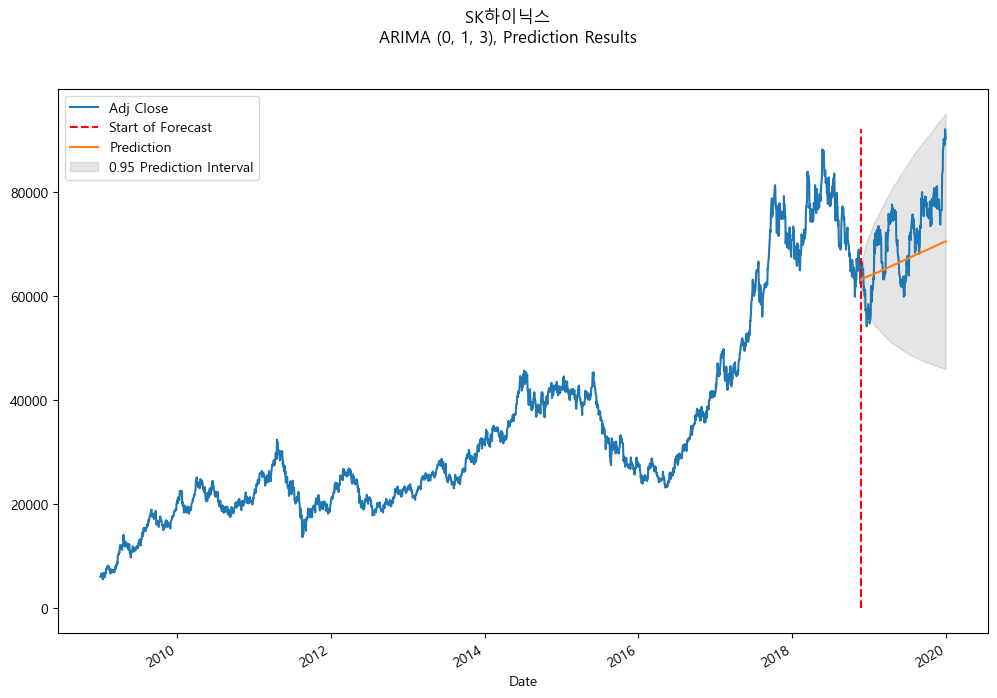

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=37585.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=37587.697, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=37585.225, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=37579.809, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=37575.583, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=37576.912, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=37587.697, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=37589.741, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=37571.989, Time=1.06 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=37573.690, Time=1.69 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=37576.542, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=37585.762, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=37571.930, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=37573.867, Time=1.66 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=37575.712, Time=2.48

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


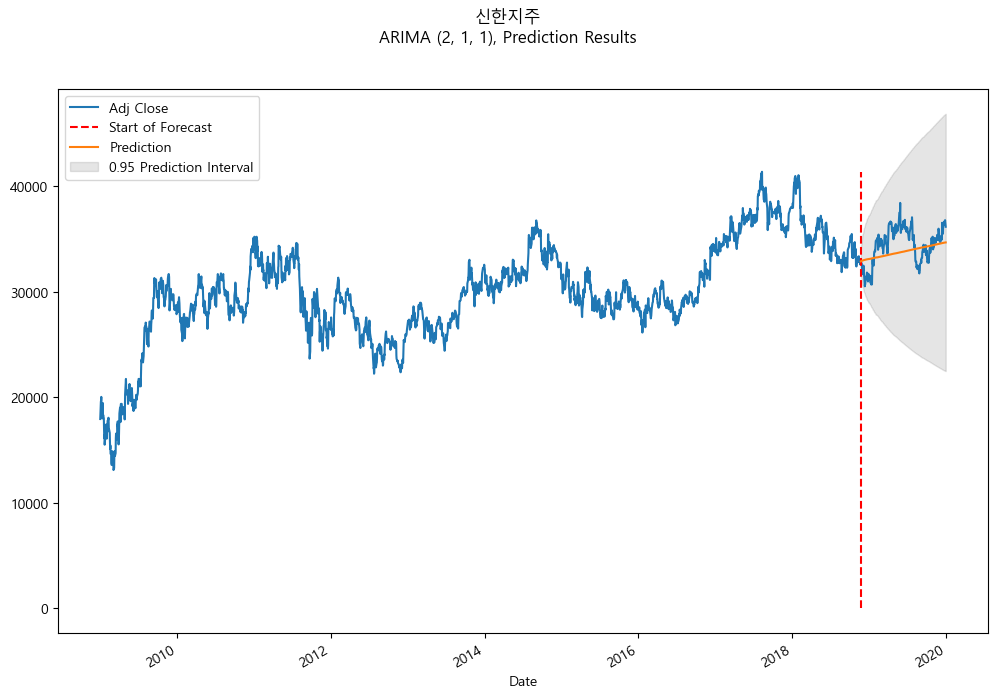

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=45697.149, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=45698.864, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=45700.580, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=45702.538, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=45700.776, Time=0.28 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=45701.494, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=45698.867, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=45699.597, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=45701.459, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=45704.620, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=45701.802, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=45700.597, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=45701.471, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=45703.089, Time=1.17 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=45704.915, Time=1.95

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


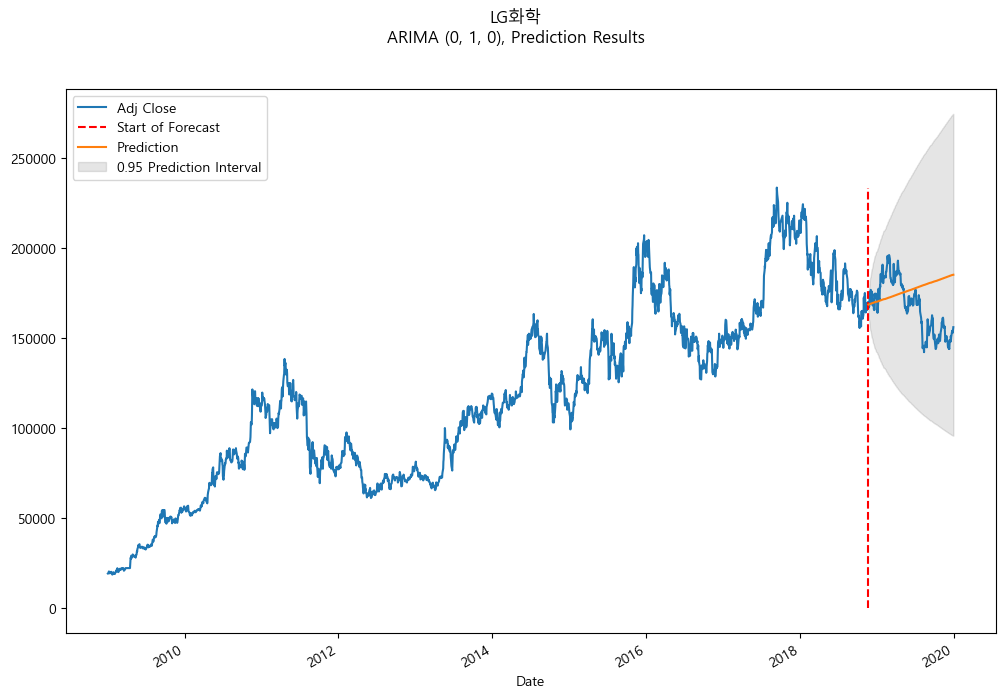

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=36799.027, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=36794.311, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=36783.061, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=36766.316, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=36768.071, Time=0.29 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=36769.427, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=36794.995, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=36771.765, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=36771.432, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=36767.933, Time=1.11 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=36769.992, Time=1.59 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=36785.488, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=36771.213, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=36773.143, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=36769.916, Time=0.44

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


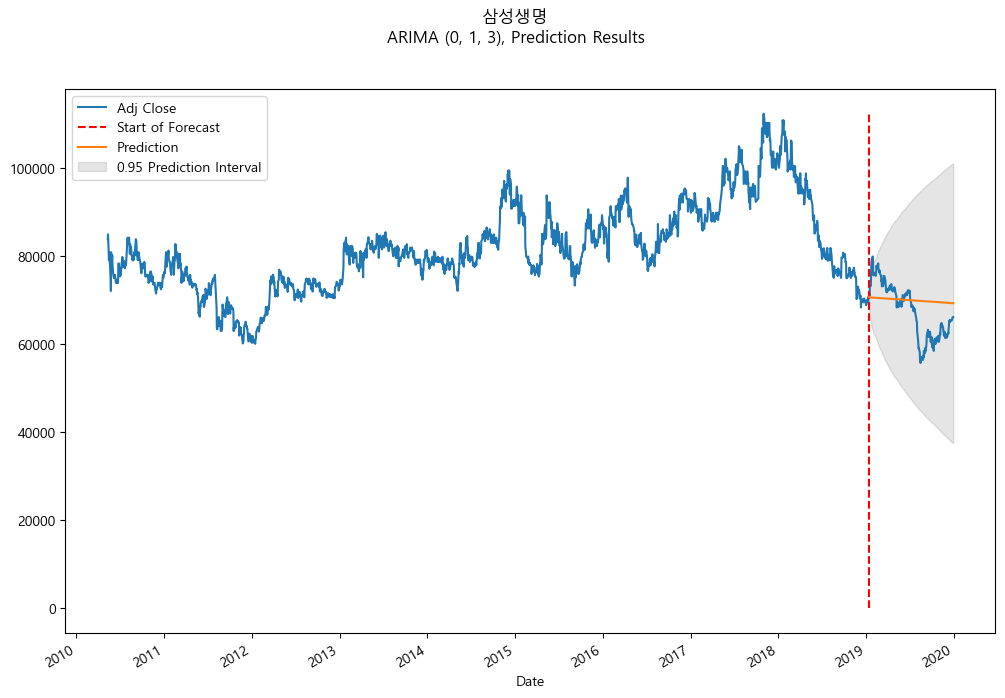

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=45273.337, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=45258.576, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=45244.858, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=45246.108, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=45246.623, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=45248.370, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=45261.180, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=45246.189, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=45245.710, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=45247.696, Time=0.51 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=45248.611, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=45247.221, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=45245.872, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=45246.971, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=45248.977, Time=0.57

c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yeji_\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


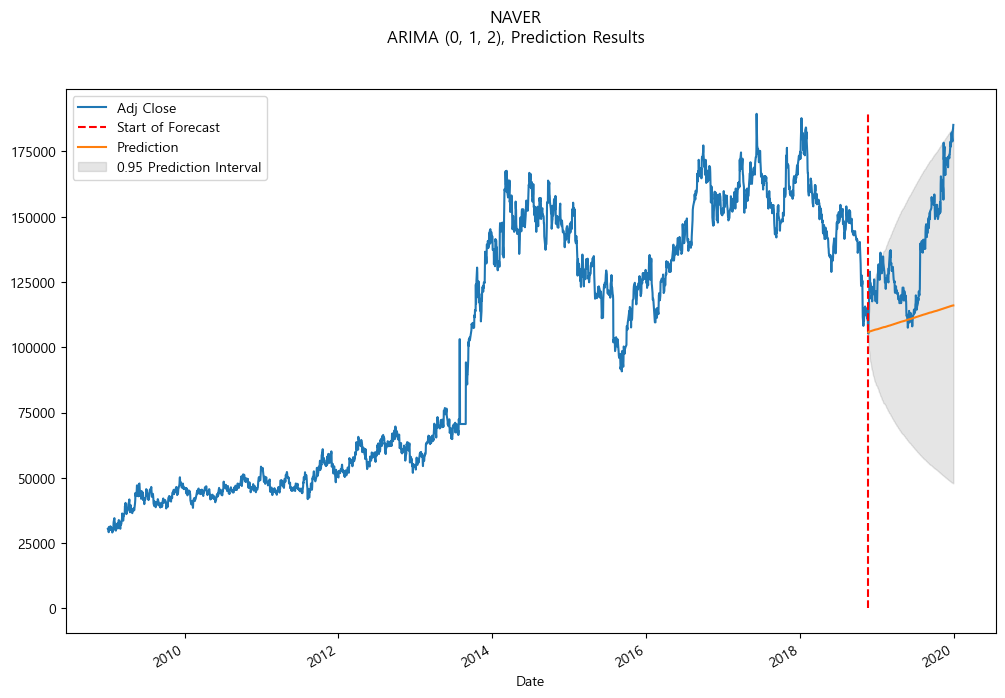

In [ ]:
# 8. 그래프를 통한 예측결과 확인
for k, v in st.items():
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False ,random_state=42)

    model = auto_arima(
    df_train['Adj Close'], start_p=1, start_q=1,
    d=1,
    trace=True,
    error_action='ignore',
    stepwise=False,
    suppress_warnings=True
    )
    
    # model.predict를 통해 미래값을 예측하는데 사용!
    # forecast 는 예측된 값, conf_int : 예측 구간
    forecast = model.predict(len(df_test), return_conf_int=True, start=df_test.index[0], end=df_test.index[-1])

    forecast_value = forecast[0]
    forecast_lb = forecast[1][:,0]
    forecast_ub = forecast[1][:,1]
    forecast_index = list(df_test.index)

    fig, ax = plt.subplots(figsize=(12, 8))
    v['Adj Close'].plot()
    ax.vlines(forecast_index[0],0, max(v['Adj Close']), linestyle='--',color='r', label='Start of Forecast')
    ax.plot(forecast_index, forecast_value, label='Prediction')
    ax.fill_between(forecast_index, forecast_lb, forecast_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
    ax.legend(loc='upper left')
    plt.suptitle(f'{k}\nARIMA {model.order}, Prediction Results')
    plt.show()
    

C:\Users\yeji_\AppData\Local\Temp\ipykernel_40192\485276220.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\yeji_\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


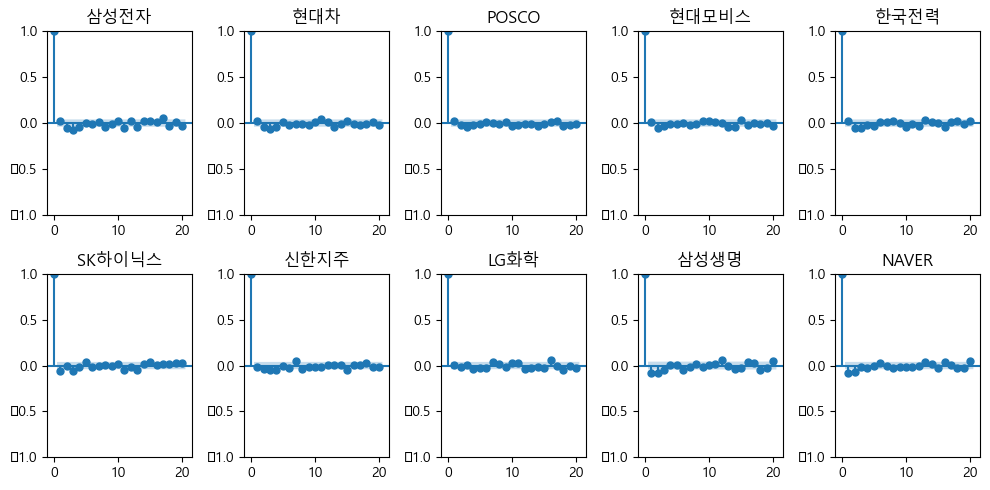

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')



# 5. 차분 진행
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for (k, v), ax in zip(st.items(), axes.flatten()):
    df_train, df_test = train_test_split(v, test_size=0.1, shuffle=False, random_state=42)
    
    # 적절한 차분 횟수 확인
    # alpha는 adf테스트에서 사용되는 유의 수준!
    diff = ndiffs(df_train['Adj Close'], test='adf', alpha=0.05, max_d=5)

    # 차분 진행!
    if diff >= 1:
        diff_train = df_train.diff(diff).dropna()
    
    # 차분 후 acf 그래프 그리기
    plot_acf(diff_train['Adj Close'], ax=ax, lags=20, title=k)

plt.tight_layout()
plt.show()

In [ ]:
1. ACF 및 PACF 그래프 그리기

SyntaxError: invalid syntax (1447379985.py, line 1)